In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO


In [23]:
import numpy as np

In [ ]:
import pandas as pd

match = pd.read_csv(r'D:\AI\cuoikiDS\data\MatchTbl.csv')
team_match = pd.read_csv(r'D:\AI\cuoikiDS\data\TeamMatchTbl.csv')
rank = pd.read_csv(r'D:\AI\cuoikiDS\data\RankTbl.csv') # Bảng mới thay thế
champion = pd.read_csv(r'D:\AI\cuoikiDS\data\ChampionTbl.csv')

match['MatchId'] = match['MatchId'].astype(str)
match['RankFk'] = match['RankFk'].astype(str)
team_match['MatchFk'] = team_match['MatchFk'].astype(str)
rank['RankId'] = rank['RankId'].astype(str)

match_classic = match[match['QueueType'].str.upper() == 'CLASSIC']


df_combined = pd.merge(match_classic, rank, left_on='RankFk', right_on='RankId')

df_combined = pd.merge(df_combined, team_match, left_on='MatchId', right_on='MatchFk')

df_final = df_combined.drop(columns=['RankId', 'MatchFk'])

print(f"Số trận Classic tìm thấy: {len(match_classic)}")
print("--- DỮ LIỆU SAU KHI KẾT NỐI VỚI RANK ---")
print(df_final[['MatchId', 'QueueType', 'RankName', 'BlueWin', 'RedWin']].head())

Số trận Classic tìm thấy: 83062
--- DỮ LIỆU SAU KHI KẾT NỐI VỚI RANK ---
           MatchId QueueType  RankName  BlueWin  RedWin
0  EUN1_3709211408   CLASSIC  Unranked        1       0
1  EUN1_3723608351   CLASSIC  Unranked        1       0
2  EUN1_3723617370   CLASSIC  Unranked        0       1
3  EUN1_3723935576   CLASSIC  Unranked        1       0
4  EUN1_3723953082   CLASSIC  Unranked        1       0


In [15]:
df_final.describe()

,GameDuration,TeamID,B1Champ,B2Champ,B3Champ,B4Champ,B5Champ,R1Champ,R2Champ,R3Champ,...,BlueDragonKills,BlueTowerKills,BlueKills,RedBaronKills,RedRiftHeraldKills,RedDragonKills,RedTowerKills,RedKills,RedWin,BlueWin
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,...,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,1714.174172,50675.058577,222.860315,165.019672,218.442941,225.350602,239.603844,210.120698,164.229111,217.917934,...,1.798345,5.737168,29.623488,0.398824,0.406211,2.018276,5.647825,29.544501,0.496758,0.503064
std,461.689437,27575.454536,294.757667,198.228683,273.674285,264.404696,243.595222,284.294137,196.413217,272.877704,...,1.354014,3.700569,13.070691,0.602833,0.491128,1.389592,3.731834,13.272775,0.499993,0.499994
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1493.000000,28638.750000,39.000000,56.000000,55.000000,51.000000,53.000000,39.000000,56.000000,55.000000,...,1.000000,3.000000,20.000000,0.000000,0.000000,1.000000,2.000000,20.000000,0.000000,0.000000
50%,1724.000000,51166.500000,86.000000,106.000000,105.000000,136.000000,117.000000,86.000000,106.000000,105.000000,...,2.000000,5.000000,30.000000,0.000000,0.000000,2.000000,5.000000,30.000000,0.000000,1.000000
75%,1975.000000,73779.250000,238.000000,233.000000,238.000000,222.000000,412.000000,164.000000,233.000000,238.000000,...,3.000000,9.000000,39.000000,1.000000,1.000000,3.000000,9.000000,39.000000,1.000000,1.000000
max,4151.000000,97883.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,...,7.000000,17.000000,100.000000,5.000000,1.000000,8.000000,19.000000,136.000000,1.000000,1.000000


In [16]:
df_final

,MatchId,Patch,QueueType,RankFk,GameDuration,RankName,TeamID,B1Champ,B2Champ,B3Champ,...,BlueDragonKills,BlueTowerKills,BlueKills,RedBaronKills,RedRiftHeraldKills,RedDragonKills,RedTowerKills,RedKills,RedWin,BlueWin
0,EUN1_3709211408,14.24.642.1879,CLASSIC,0,1986,Unranked,45979,887,5,8,...,4,9,42,1,0,1,6,25,0,1
1,EUN1_3723608351,14.24.644.2327,CLASSIC,0,1376,Unranked,45975,79,233,3,...,3,10,47,0,0,0,0,24,0,1
2,EUN1_3723617370,14.24.644.2327,CLASSIC,0,2176,Unranked,45974,122,11,42,...,3,4,34,2,1,2,11,44,1,0
3,EUN1_3723935576,14.24.644.2327,CLASSIC,0,920,Unranked,45973,48,234,13,...,1,4,23,0,0,0,1,11,0,1
4,EUN1_3723953082,14.24.644.2327,CLASSIC,0,1086,Unranked,45972,48,233,99,...,2,5,27,0,1,0,1,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,NA1_5430182706,15.24.731.5210,CLASSIC,5,1521,Platinum,97299,86,143,799,...,1,2,22,0,1,2,8,31,1,0
73096,NA1_5430185441,15.24.731.5210,CLASSIC,6,2148,Emerald,97319,36,99,101,...,0,3,38,2,1,5,13,44,1,0
73097,NA1_5430214458,15.24.731.5210,CLASSIC,8,1733,Master,97602,904,11,55,...,0,1,11,1,1,4,11,23,1,0
73098,NA1_5430221110,15.24.731.5210,CLASSIC,8,2370,Master,97584,887,91,80,...,3,7,37,0,0,3,8,26,0,1


In [17]:
df_final.columns

Index(['MatchId', 'Patch', 'QueueType', 'RankFk', 'GameDuration', 'RankName',
       'TeamID', 'B1Champ', 'B2Champ', 'B3Champ', 'B4Champ', 'B5Champ',
       'R1Champ', 'R2Champ', 'R3Champ', 'R4Champ', 'R5Champ', 'BlueBaronKills',
       'BlueRiftHeraldKills', 'BlueDragonKills', 'BlueTowerKills', 'BlueKills',
       'RedBaronKills', 'RedRiftHeraldKills', 'RedDragonKills',
       'RedTowerKills', 'RedKills', 'RedWin', 'BlueWin'],
      dtype='object')

C:\Users\Minh\AppData\Local\Temp\ipykernel_9500\2241435105.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WinRate', y='ChampionName', data=stats.head(30), palette='viridis')


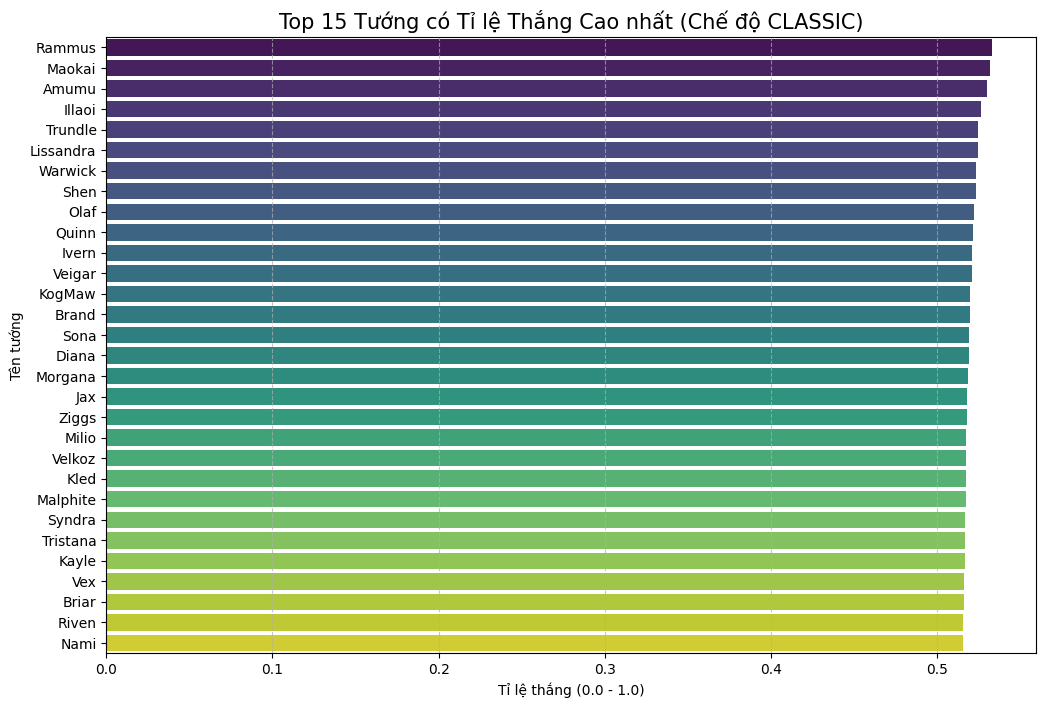

In [ ]:
blue_champs = df_final.melt(id_vars=['BlueWin'], value_vars=['B1Champ', 'B2Champ', 'B3Champ', 'B4Champ', 'B5Champ'], 
                            var_name='Position', value_name='ChampionId')
blue_champs.rename(columns={'BlueWin': 'Win'}, inplace=True)

red_champs = df_final.melt(id_vars=['RedWin'], value_vars=['R1Champ', 'R2Champ', 'R3Champ', 'R4Champ', 'R5Champ'], 
                           var_name='Position', value_name='ChampionId')
red_champs.rename(columns={'RedWin': 'Win'}, inplace=True)

all_games = pd.concat([blue_champs, red_champs])

stats = all_games.groupby('ChampionId')['Win'].agg(['count', 'mean']).reset_index()
stats.columns = ['ChampionId', 'TotalGames', 'WinRate']

stats = pd.merge(stats, champion, left_on='ChampionId', right_on='ChampionId')

stats = stats[stats['TotalGames'] > 5].sort_values(by='WinRate', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='WinRate', y='ChampionName', data=stats.head(30), palette='viridis')

plt.title('Top 15 Tướng có Tỉ lệ Thắng Cao nhất (Chế độ CLASSIC)', fontsize=15)
plt.xlabel('Tỉ lệ thắng (0.0 - 1.0)')
plt.ylabel('Tên tướng')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Minh\AppData\Local\Temp\ipykernel_9500\3125297289.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=win_counts, palette=colors, ax=ax[1])


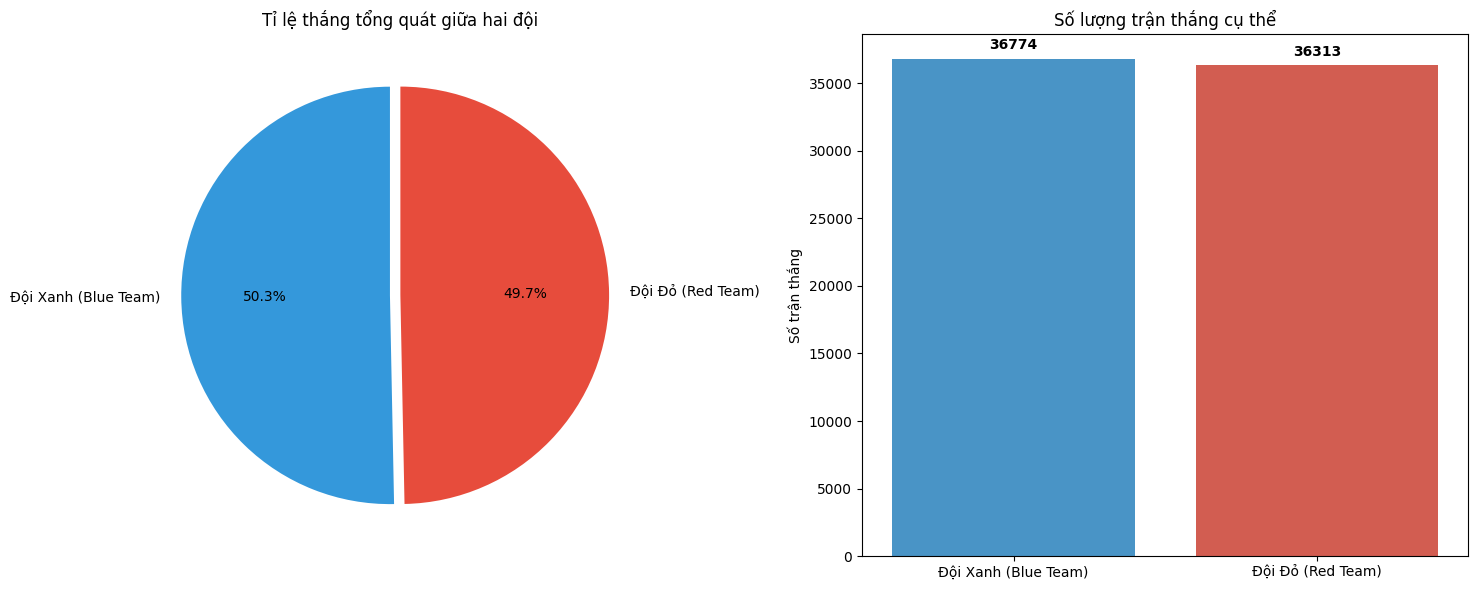

Tổng số trận đấu: 73100
Số trận Đội Xanh thắng: 36774 (50.31%)
Số trận Đội Đỏ thắng: 36313 (49.68%)


In [ ]:
blue_wins = df_final['BlueWin'].sum()
red_wins = df_final['RedWin'].sum()
total_matches = len(df_final)

labels = ['Đội Xanh (Blue Team)', 'Đội Đỏ (Red Team)']
win_counts = [blue_wins, red_wins]
colors = ['#3498db', '#e74c3c'] 

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].pie(win_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0))
ax[0].set_title('Tỉ lệ thắng tổng quát giữa hai đội')

sns.barplot(x=labels, y=win_counts, palette=colors, ax=ax[1])
ax[1].set_title('Số lượng trận thắng cụ thể')
ax[1].set_ylabel('Số trận thắng')

for i, v in enumerate(win_counts):
    ax[1].text(i, v + (total_matches*0.01), str(int(v)), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Tổng số trận đấu: {total_matches}")
print(f"Số trận Đội Xanh thắng: {blue_wins} ({blue_wins/total_matches:.2%})")
print(f"Số trận Đội Đỏ thắng: {red_wins} ({red_wins/total_matches:.2%})")

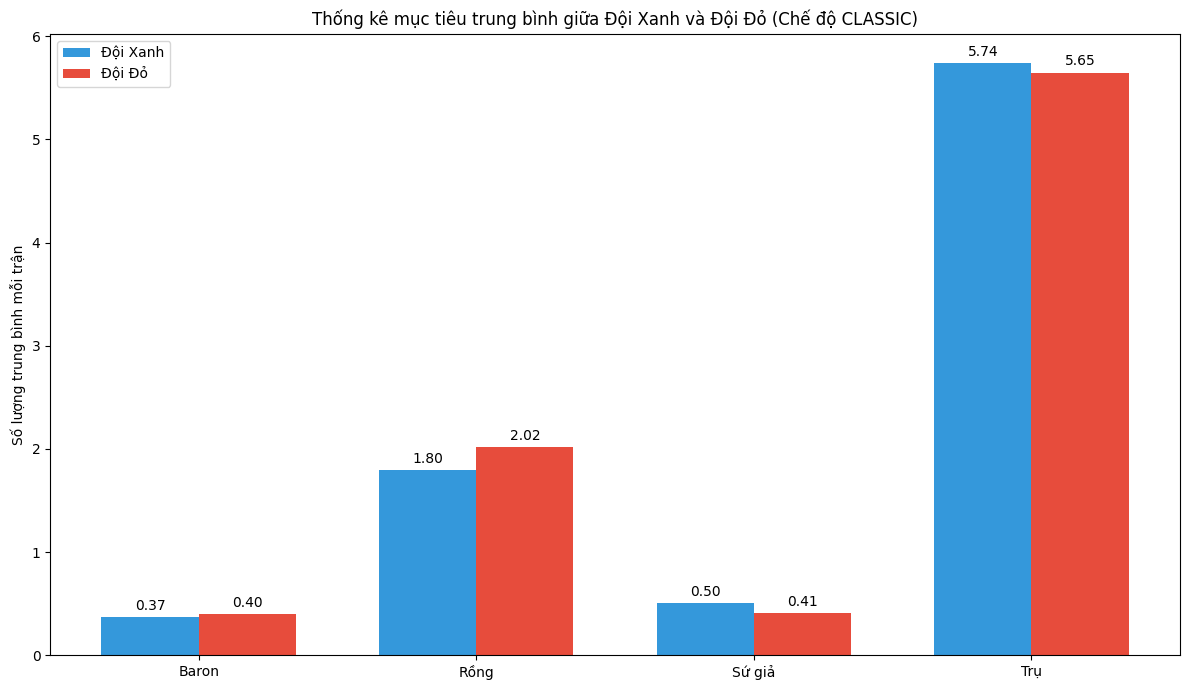

In [ ]:
objectives = {
    'Baron': ['BlueBaronKills', 'RedBaronKills'],
    'Rồng': ['BlueDragonKills', 'RedDragonKills'],
    'Sứ giả': ['BlueRiftHeraldKills', 'RedRiftHeraldKills'],
    'Trụ': ['BlueTowerKills', 'RedTowerKills']
}

stats_list = []
for label, cols in objectives.items():
    stats_list.append({
        'Mục tiêu': label,
        'Đội Xanh': df_final[cols[0]].mean(),
        'Đội Đỏ': df_final[cols[1]].mean()
    })

df_stats = pd.DataFrame(stats_list)

x = np.arange(len(df_stats['Mục tiêu']))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, df_stats['Đội Xanh'], width, label='Đội Xanh', color='#3498db')
rects2 = ax.bar(x + width/2, df_stats['Đội Đỏ'], width, label='Đội Đỏ', color='#e74c3c')

ax.set_ylabel('Số lượng trung bình mỗi trận')
ax.set_title('Thống kê mục tiêu trung bình giữa Đội Xanh và Đội Đỏ (Chế độ CLASSIC)')
ax.set_xticks(x)
ax.set_xticklabels(df_stats['Mục tiêu'])
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

plt.tight_layout()
plt.show()

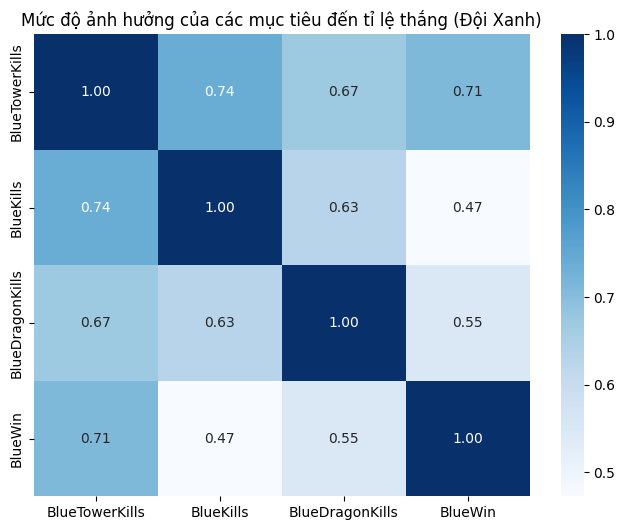

In [25]:
correlation_cols = ['BlueTowerKills', 'BlueKills', 'BlueDragonKills', 'BlueWin']
plt.figure(figsize=(8, 6))
sns.heatmap(df_final[correlation_cols].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Mức độ ảnh hưởng của các mục tiêu đến tỉ lệ thắng (Đội Xanh)')
plt.show()

In [26]:
high_ranks = ['GRANDMASTER', 'CHALLENGER']

# Lọc DataFrame (Dùng .str.upper() để tránh lỗi viết hoa/thường)
df_high_rank = df_final[df_final['RankName'].str.upper().isin(high_ranks)]

print(f"Số trận đấu từ rank Grandmaster trở lên: {len(df_high_rank)}")
print(df_high_rank.head())

Số trận đấu từ rank Grandmaster trở lên: 1989
              MatchId           Patch QueueType RankFk  GameDuration  \
4376  EUW1_7541698312  15.19.714.7225   CLASSIC     10           945   
4378  EUW1_7541753352  15.19.714.7225   CLASSIC     10          1307   
4380  EUW1_7541834825  15.19.714.7225   CLASSIC     10          2615   
4386  EUW1_7541944499  15.19.714.7225   CLASSIC     10          1212   
4387  EUW1_7541997814  15.19.714.7225   CLASSIC     10          1936   

        RankName  TeamID  B1Champ  B2Champ  B3Champ  ...  BlueDragonKills  \
4376  Challenger   25597      266      131       61  ...                1   
4378  Challenger   25596      893       36        9  ...                2   
4380  Challenger   25595      266      950        9  ...                4   
4386  Challenger   25594      122      131      157  ...                3   
4387  Challenger   25593      122      121      893  ...                3   

      BlueTowerKills  BlueKills  RedBaronKills  RedRiftHer

C:\Users\Minh\AppData\Local\Temp\ipykernel_9500\1407753039.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WinRate', y='ChampionName', data=stats_high_rank.head(30), palette='viridis')


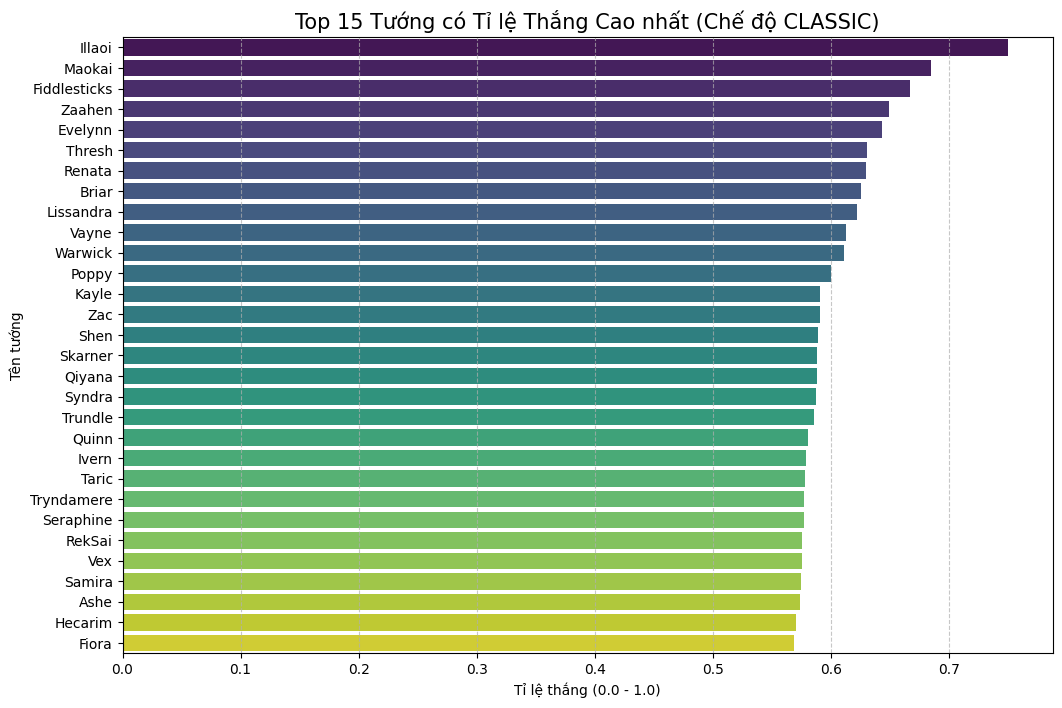

In [27]:
blue_champs_high_rank = df_high_rank.melt(id_vars=['BlueWin'], value_vars=['B1Champ', 'B2Champ', 'B3Champ', 'B4Champ', 'B5Champ'], 
                            var_name='Position', value_name='ChampionId')
blue_champs_high_rank.rename(columns={'BlueWin': 'Win'}, inplace=True)

# Đội Red (R1 đến R5)
red_champs_high_rank = df_high_rank.melt(id_vars=['RedWin'], value_vars=['R1Champ', 'R2Champ', 'R3Champ', 'R4Champ', 'R5Champ'], 
                           var_name='Position', value_name='ChampionId')
red_champs_high_rank.rename(columns={'RedWin': 'Win'}, inplace=True)

# Gộp cả 2 đội lại thành 1 danh sách tổng
all_games_high_rank = pd.concat([blue_champs_high_rank, red_champs_high_rank])

# --- BƯỚC 2: Tính Win Rate ---
# Group theo ChampionId để tính trung bình cột Win (1 là thắng, 0 là thua)
stats_high_rank = all_games_high_rank.groupby('ChampionId')['Win'].agg(['count', 'mean']).reset_index()
stats_high_rank.columns = ['ChampionId', 'TotalGames', 'WinRate']

# Merge với bảng ChampionTbl để lấy tên tướng (giả sử bạn đã load bảng champion)
stats_high_rank = pd.merge(stats_high_rank, champion, left_on='ChampionId', right_on='ChampionId')

# Lọc các tướng có số trận chơi đủ lớn (ví dụ > 5 trận) để số liệu chính xác hơn
stats_high_rank = stats_high_rank[stats_high_rank['TotalGames'] > 5].sort_values(by='WinRate', ascending=False)

# --- BƯỚC 3: Visualize ---
plt.figure(figsize=(12, 8))
sns.barplot(x='WinRate', y='ChampionName', data=stats_high_rank.head(30), palette='viridis')

plt.title('Top 15 Tướng có Tỉ lệ Thắng Cao nhất (Chế độ CLASSIC)', fontsize=15)
plt.xlabel('Tỉ lệ thắng (0.0 - 1.0)')
plt.ylabel('Tên tướng')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

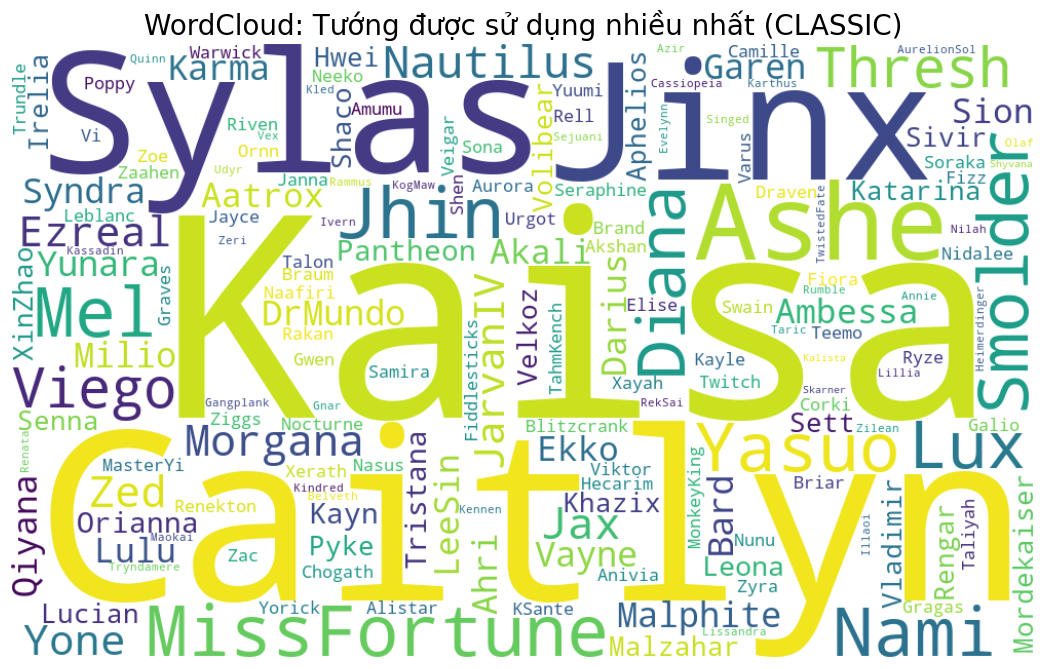

In [28]:
champ_columns = ['B1Champ', 'B2Champ', 'B3Champ', 'B4Champ', 'B5Champ', 
                 'R1Champ', 'R2Champ', 'R3Champ', 'R4Champ', 'R5Champ']

# Lấy tất cả giá trị ID tướng và chuyển thành một Series
all_champs_played = df_final[champ_columns].values.flatten()

# Chuyển về DataFrame để dễ dàng map với tên tướng
temp_df = pd.DataFrame(all_champs_played, columns=['ChampionId'])

# Map ID với tên tướng từ bảng ChampionTbl
# Giả sử bảng champion của bạn có cột 'ChampionId' và 'ChampionName'
temp_df = temp_df.merge(champion, on='ChampionId', how='left')

# Loại bỏ các giá trị bị thiếu nếu có
list_of_names = temp_df['ChampionName'].dropna().astype(str).tolist()

# --- BƯỚC 2: Tạo dữ liệu văn bản cho WordCloud ---
# Nối tất cả tên tướng thành một chuỗi dài, cách nhau bởi khoảng trắng
# Lưu ý: Với tên tướng có khoảng trắng (ví dụ: Lee Sin), ta nên thay khoảng trắng bằng dấu gạch dưới
text = " ".join([name.replace(" ", "_") for name in list_of_names])

# --- BƯỚC 3: Vẽ WordCloud ---
wordcloud = WordCloud(
    width=1000, 
    height=600, 
    background_color='white',
    colormap='viridis',      # Màu sắc (có thể chọn 'magma', 'inferno', 'plasma')
    collocations=False,      # Tránh lặp lại các cụm từ
    min_font_size=10
).generate(text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Tắt trục tọa độ
plt.title("WordCloud: Tướng được sử dụng nhiều nhất (CLASSIC)", fontsize=20)
plt.show()

C:\Users\Minh\AppData\Local\Temp\ipykernel_9500\3024110520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final, x='RankName', palette='viridis')


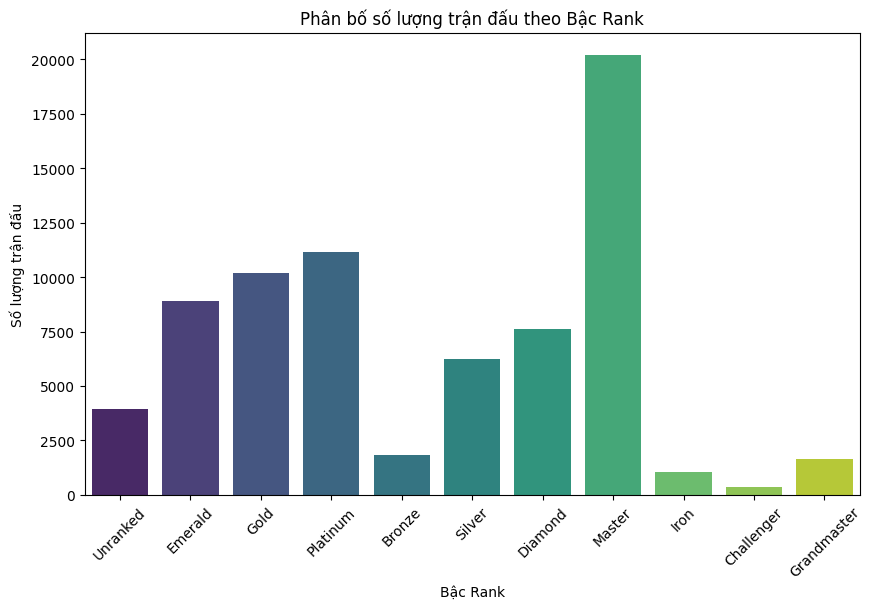

In [29]:
plt.figure(figsize=(10, 6))
# Sắp xếp thứ tự Rank nếu cần (ví dụ từ Iron đến Challenger)
sns.countplot(data=df_final, x='RankName', palette='viridis')
plt.title('Phân bố số lượng trận đấu theo Bậc Rank')
plt.xlabel('Bậc Rank')
plt.ylabel('Số lượng trận đấu')
plt.xticks(rotation=45)
plt.show()

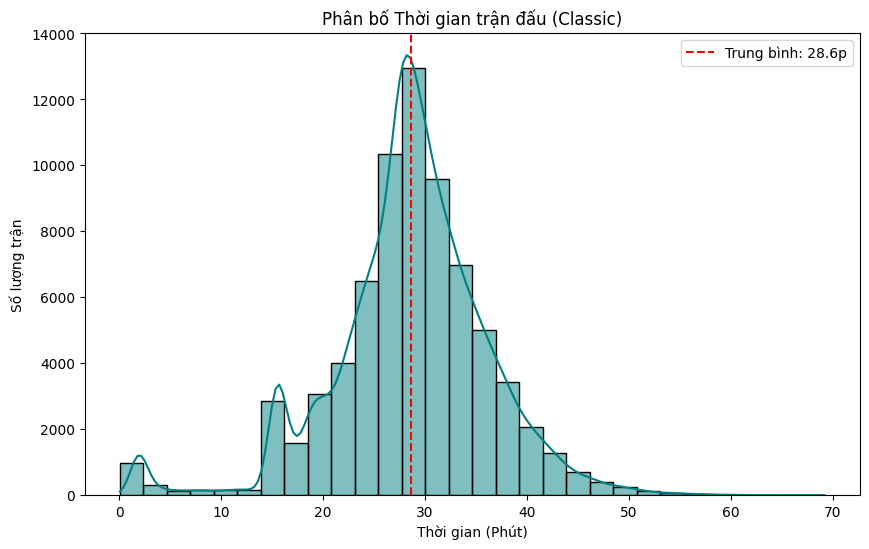

In [30]:
plt.figure(figsize=(10, 6))
# Chuyển GameDuration sang phút nếu nó đang ở giây
duration_minutes = df_final['GameDuration'] / 60

sns.histplot(duration_minutes, bins=30, kde=True, color='teal')
plt.axvline(duration_minutes.mean(), color='red', linestyle='--', label=f'Trung bình: {duration_minutes.mean():.1f}p')

plt.title('Phân bố Thời gian trận đấu (Classic)')
plt.xlabel('Thời gian (Phút)')
plt.ylabel('Số lượng trận')
plt.legend()
plt.show()